## Steps
1. Download all raw data for a given year and month
1. For each raw data, apply the filter before saving it
1. Transform the saved raw data into TS data
1. Convert the ts data into features and targets
1. Save the transformed data


Main objective is to write utility functions to do all these things so we can reuse them later. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now import your Citi Bike utility
from src.data_utils import load_and_process_citibike_data


In [3]:
rides = load_and_process_citibike_data(year=2023)


⬇️ Downloading 2023-citibike-tripdata.zip from https://s3.amazonaws.com/tripdata/2023-citibike-tripdata.zip


KeyboardInterrupt: 

In [25]:
import pandas as pd
from pathlib import Path
from collections import Counter

base_path = Path("/Users/rohanjain/github/sp25_taxi-main/data/raw/2023-citibike-tripdata/2023-citibike-tripdata")

all_counts = Counter()

# Loop through each month's folder
for month in range(1, 13):
    month_str = f"{2023}{month:02d}-citibike-tripdata"
    month_path = base_path / month_str
    if not month_path.exists():
        print(f"❌ Skipping missing folder: {month_path}")
        continue

    csv_files = list(month_path.glob("*.csv"))
    print(f"\n📂 Found {len(csv_files)} CSVs in: {month_path.name}")

    for csv_file in csv_files:
        try:
            df = pd.read_csv(csv_file, low_memory=False)
            if 'start_station_id' in df.columns:
                df = df.dropna(subset=['start_station_id'])
                counts = df['start_station_id'].value_counts()
                all_counts.update(counts.to_dict())
            else:
                print(f"⚠️ Missing 'start_station_id' in {csv_file.name}")
        except Exception as e:
            print(f"❌ Failed to read {csv_file.name}: {e}")

# Get top 3 most frequent start station IDs
top_3 = all_counts.most_common(3)
print("\n🏆 Top 3 Start Station IDs by Ride Count:")
for idx, (station_id, count) in enumerate(top_3, 1):
    print(f"{idx}. Station ID: {station_id} — {count:,} rides")



📂 Found 2 CSVs in: 202301-citibike-tripdata

📂 Found 2 CSVs in: 202302-citibike-tripdata

📂 Found 3 CSVs in: 202303-citibike-tripdata

📂 Found 3 CSVs in: 202304-citibike-tripdata

📂 Found 4 CSVs in: 202305-citibike-tripdata

📂 Found 4 CSVs in: 202306-citibike-tripdata

📂 Found 4 CSVs in: 202307-citibike-tripdata

📂 Found 4 CSVs in: 202308-citibike-tripdata

📂 Found 4 CSVs in: 202309-citibike-tripdata

📂 Found 4 CSVs in: 202310-citibike-tripdata

📂 Found 3 CSVs in: 202311-citibike-tripdata

📂 Found 3 CSVs in: 202312-citibike-tripdata

🏆 Top 3 Start Station IDs by Ride Count:
1. Station ID: 6140.05 — 125,462 rides
2. Station ID: 6948.10 — 104,527 rides
3. Station ID: 5329.03 — 101,276 rides


In [4]:
import pandas as pd
from pathlib import Path

# Path to processed data folder
processed_folder = Path("..") / "data" / "processed"

# Load and combine all parquet files starting with "rides_"
parquet_files = list(processed_folder.glob("rides_*.parquet"))

processed_rides = pd.concat(
    [pd.read_parquet(file) for file in parquet_files],
    ignore_index=True
)

print(f"Loaded {len(parquet_files)} files into 'processed_rides' with {len(processed_rides)} rows.")


Loaded 12 files into 'processed_rides' with 1051856 rows.


In [5]:
processed_rides

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CD89CCE98ED4A830,classic_bike,2024-05-27 13:48:06.000,2024-05-27 13:50:25.000,Madison St & 10 St,HB503,7 St & Monroe St,HB304,40.749943,-74.035865,40.746413,-74.037977,member
1,D6AE40DD78B49217,classic_bike,2024-05-22 20:10:50.000,2024-05-22 20:22:13.000,Madison St & 10 St,HB503,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.749943,-74.035865,40.736982,-74.027781,member
2,39FDE65AAE7A4A22,electric_bike,2024-05-22 16:53:00.000,2024-05-22 17:12:58.000,Clinton St & 7 St,HB303,Columbus Drive,JC014,40.745420,-74.033411,40.718355,-74.038914,member
3,B39B432803AA828B,electric_bike,2024-05-19 09:22:01.000,2024-05-19 09:30:02.000,Jersey & 6th St,JC027,Columbus Drive,JC014,40.725227,-74.045349,40.718355,-74.038914,member
4,0B7EE5E35F5BC47D,electric_bike,2024-05-10 19:59:35.000,2024-05-10 20:10:13.000,Jersey & 6th St,JC027,Columbus Drive,JC014,40.725218,-74.045337,40.718355,-74.038914,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051851,625520065FA7A6B5,electric_bike,2025-04-24 18:01:30.970,2025-04-24 18:16:42.730,Van Vorst Park,JC035,Clinton St & 7 St,HB303,40.718489,-74.047727,40.745420,-74.033320,casual
1051852,C2B319CC8CFC222E,electric_bike,2025-04-06 07:27:33.111,2025-04-06 07:30:23.881,Van Vorst Park,JC035,Jersey & 6th St,JC027,40.718489,-74.047727,40.725289,-74.045572,casual
1051853,8941FBC1ED00D8F3,electric_bike,2025-04-29 20:23:20.255,2025-04-29 21:31:20.619,Van Vorst Park,JC035,None,None,40.718489,-74.047727,40.720000,-74.050000,member
1051854,7B785591BC624390,electric_bike,2025-04-29 17:45:32.814,2025-04-29 18:01:16.383,Van Vorst Park,JC035,None,None,40.718489,-74.047727,40.720000,-74.050000,member


In [7]:
top_stations = processed_rides["start_station_id"].value_counts().head(3)
print(top_stations)

start_station_id
HB102    54332
JC115    47169
HB105    25936
Name: count, dtype: int64


In [8]:
# Get the 5 most common start_station_ids
top_5_stations = processed_rides["start_station_id"].value_counts().head(5).index

# Filter the data to include only those 5 stations
rides = processed_rides[processed_rides["start_station_id"].isin(top_5_stations)].copy()

print(f"'rides' DataFrame created with {len(rides)} rows from the top 5 most common start stations.")
rides.head()

'rides' DataFrame created with 177154 rows from the top 5 most common start stations.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
161,464892869A33C522,electric_bike,2024-05-27 23:16:41,2024-05-27 23:21:18,Newport PATH,JC066,Columbus Drive,JC014,40.727270,-74.033780,40.718355,-74.038914,member
162,E2359C92929CB4FA,classic_bike,2024-05-19 07:51:07,2024-05-19 08:05:50,Newport PATH,JC066,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.727224,-74.033759,40.736982,-74.027781,member
163,0A67EC503E1E0481,classic_bike,2024-05-22 13:03:58,2024-05-22 13:10:19,Newport PATH,JC066,Columbus Drive,JC014,40.727224,-74.033759,40.718355,-74.038914,member
164,00F8E8E2B7449B36,electric_bike,2024-05-15 15:56:48,2024-05-15 16:02:16,Newport PATH,JC066,Columbus Drive,JC014,40.727168,-74.033584,40.718355,-74.038914,member
165,12E50EE42A9ED547,electric_bike,2024-05-19 18:16:50,2024-05-19 18:32:05,Newport PATH,JC066,Columbus Drive,JC014,40.727260,-74.033843,40.718355,-74.038914,member


In [10]:
rides

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
161,464892869A33C522,electric_bike,2024-05-27 23:16:41.000,2024-05-27 23:21:18.000,Newport PATH,JC066,Columbus Drive,JC014,40.727270,-74.033780,40.718355,-74.038914,member
162,E2359C92929CB4FA,classic_bike,2024-05-19 07:51:07.000,2024-05-19 08:05:50.000,Newport PATH,JC066,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.727224,-74.033759,40.736982,-74.027781,member
163,0A67EC503E1E0481,classic_bike,2024-05-22 13:03:58.000,2024-05-22 13:10:19.000,Newport PATH,JC066,Columbus Drive,JC014,40.727224,-74.033759,40.718355,-74.038914,member
164,00F8E8E2B7449B36,electric_bike,2024-05-15 15:56:48.000,2024-05-15 16:02:16.000,Newport PATH,JC066,Columbus Drive,JC014,40.727168,-74.033584,40.718355,-74.038914,member
165,12E50EE42A9ED547,electric_bike,2024-05-19 18:16:50.000,2024-05-19 18:32:05.000,Newport PATH,JC066,Columbus Drive,JC014,40.727260,-74.033843,40.718355,-74.038914,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050327,8068CAF3424F0FC1,electric_bike,2025-04-18 19:39:22.195,2025-04-18 19:47:19.941,Newport PATH,JC066,Van Vorst Park,JC035,40.727224,-74.033759,40.718489,-74.047727,member
1050328,728B52ED15AA9391,classic_bike,2025-04-02 07:44:16.892,2025-04-02 07:53:00.147,Newport PATH,JC066,Van Vorst Park,JC035,40.727224,-74.033759,40.718489,-74.047727,member
1050329,84FFF998D4F38FD4,classic_bike,2025-04-01 07:42:11.772,2025-04-01 07:49:57.156,Newport PATH,JC066,Van Vorst Park,JC035,40.727224,-74.033759,40.718489,-74.047727,member
1050587,4F98B093A5872F4F,classic_bike,2025-04-19 12:13:09.668,2025-04-19 13:44:24.523,Hoboken Terminal - River St & Hudson Pl,HB102,Van Vorst Park,JC035,40.736068,-74.029127,40.718489,-74.047727,casual


In [11]:
rides["start_station_id"].value_counts()

start_station_id
HB102    54332
JC115    47169
HB105    25936
HB101    25148
JC066    24569
Name: count, dtype: int64

In [ ]:
rides.rename(columns={"start_station_id": "pickup_location_id", "started_at": "pickup_datetime"}, inplace=True)


In [13]:
from src.data_utils import transform_raw_data_into_ts_data

          pickup_hour pickup_location_id  rides
0 2024-01-06 00:00:00              HB101      0
1 2024-01-06 01:00:00              HB101      0
2 2024-01-06 02:00:00              HB101      0
3 2024-01-06 03:00:00              HB101      0
4 2024-01-06 04:00:00              HB101      0


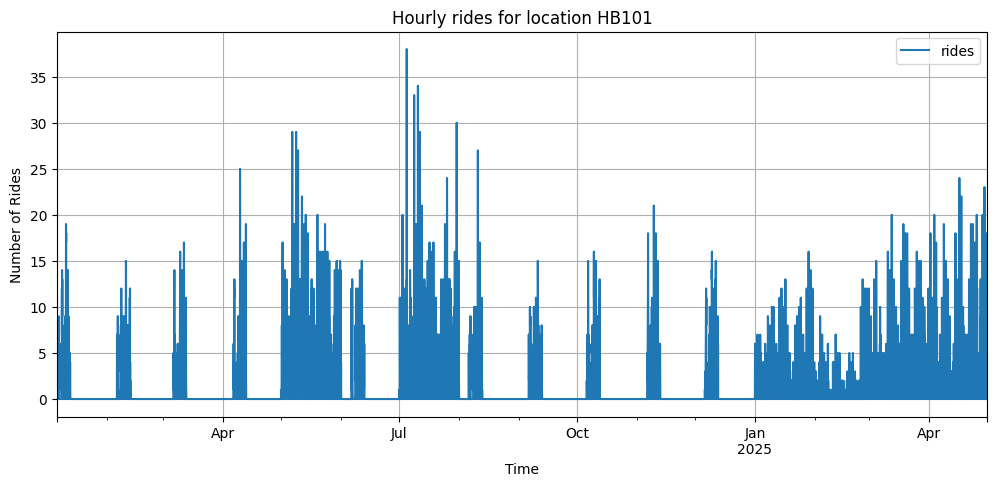

In [15]:
# Transform filtered rides into hourly time-series format
rides_ts = transform_raw_data_into_ts_data(rides)

# Preview the transformed time-series data
import matplotlib.pyplot as plt

print(rides_ts.head())

# Optional: Plot a sample time series for one location
sample_loc = rides_ts["pickup_location_id"].unique()[0]
rides_ts[rides_ts["pickup_location_id"] == sample_loc].plot(
    x="pickup_hour", y="rides", title=f"Hourly rides for location {sample_loc}", figsize=(12, 5)
)
plt.xlabel("Time")
plt.ylabel("Number of Rides")
plt.grid(True)
plt.show()


In [16]:
from src.data_utils import transform_ts_data_info_features_and_target_loop

# Create features and target from hourly ride data
features_df, target_series = transform_ts_data_info_features_and_target_loop(
    df=rides_ts,
    feature_col="rides",
    window_size=12,   # You can change this if needed
    step_size=1       # Slide by 1 hour
)

# Show feature columns
print(features_df.head())
print("\nTarget sample:")
print(target_series.head())


   rides_t-12  rides_t-11  rides_t-10  rides_t-9  rides_t-8  rides_t-7  \
0           0           0           0          0          0          0   
1           0           0           0          0          0          0   
2           0           0           0          0          0          0   
3           0           0           0          0          0          1   
4           0           0           0          0          1          2   

   rides_t-6  rides_t-5  rides_t-4  rides_t-3  rides_t-2  rides_t-1  target  \
0          0          0          1          2          5          2       7   
1          0          1          2          5          2          7       3   
2          1          2          5          2          7          3       2   
3          2          5          2          7          3          2       3   
4          5          2          7          3          2          3       3   

          pickup_hour pickup_location_id  
0 2024-01-06 12:00:00              HB

In [19]:
rides.columns

Index(['ride_id', 'rideable_type', 'pickup_datetime', 'ended_at',
       'start_station_name', 'pickup_location_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [20]:
def compare_aggregation_levels(rides_df):
    import matplotlib.pyplot as plt

    # Ensure timestamp exists
    if "pickup_hour" not in rides_df.columns:
        rides_df["pickup_hour"] = pd.to_datetime(rides_df["pickup_datetime"]).dt.floor("h")

    # Aggregate: Hourly
    hourly_agg = (
        rides_df.groupby(["pickup_hour", "pickup_location_id"])
        .size()
        .reset_index(name="rides")
    )

    # Aggregate: 4-Hour
    rides_df["pickup_4h"] = rides_df["pickup_hour"].dt.floor("4H")
    agg_4h = (
        rides_df.groupby(["pickup_4h", "pickup_location_id"])
        .size()
        .reset_index(name="rides")
    )

    # Pick a sample station for plotting
    top_station = rides_df["pickup_location_id"].value_counts().idxmax()

    fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Hourly plot
    hourly_plot = hourly_agg[hourly_agg["pickup_location_id"] == top_station]
    ax[0].plot(hourly_plot["pickup_hour"], hourly_plot["rides"])
    ax[0].set_title(f"Hourly Ride Count - Station {top_station}")
    ax[0].set_ylabel("Rides/hour")
    ax[0].grid(True)

    # 4-hour plot
    agg_4h_plot = agg_4h[agg_4h["pickup_location_id"] == top_station]
    ax[1].plot(agg_4h_plot["pickup_4h"], agg_4h_plot["rides"], color="orange")
    ax[1].set_title(f"4-Hour Ride Count - Station {top_station}")
    ax[1].set_ylabel("Rides/4 hours")
    ax[1].set_xlabel("Time")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    return top_station, hourly_plot, agg_4h_plot


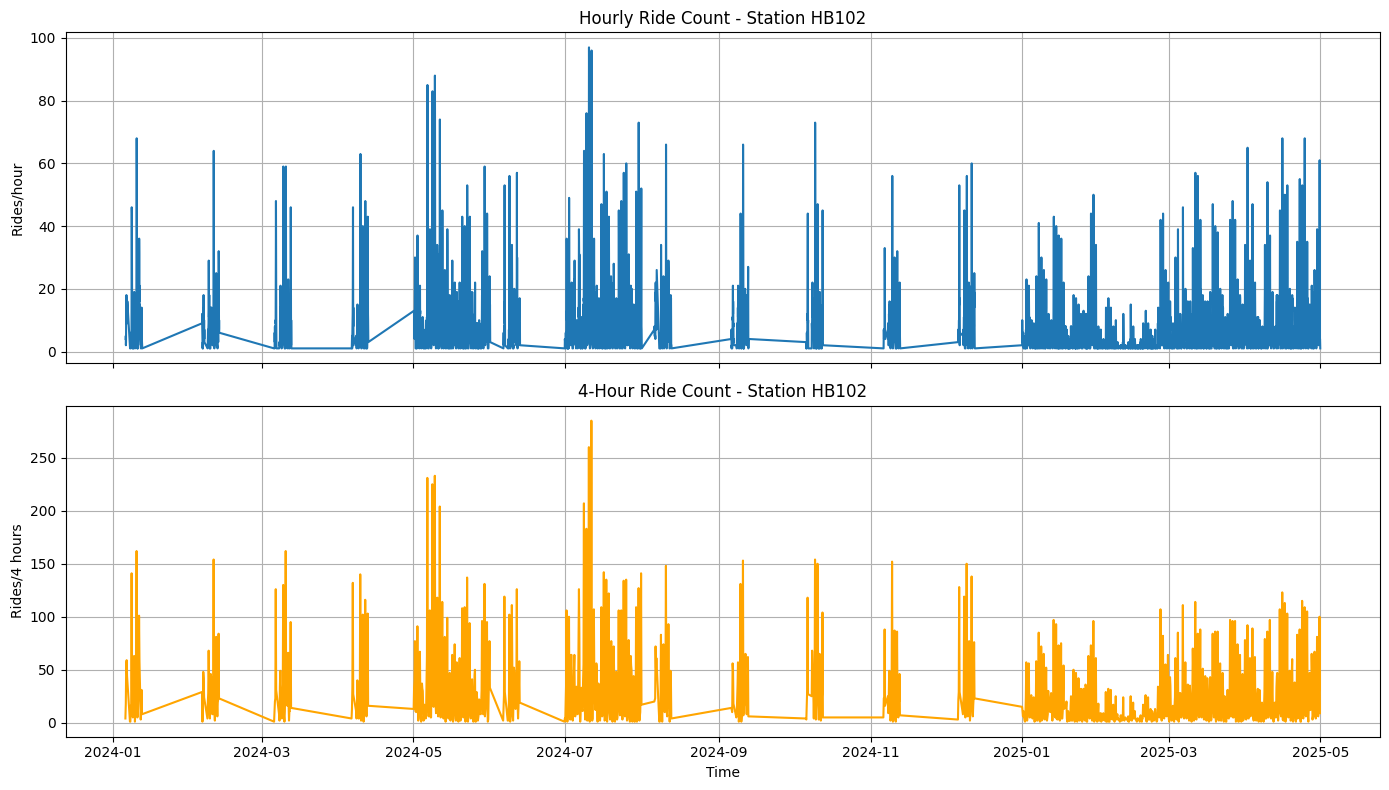

In [21]:
top_station_id, hourly_data, agg_4h_data = compare_aggregation_levels(rides)


In [22]:
from src.config import TRANSFORMED_DATA_DIR

# Combine features and target
tabular_data = features_df.copy()
tabular_data["target"] = target_series

# Save as Parquet
tabular_data.to_parquet(TRANSFORMED_DATA_DIR / "citibike_tabular_data.parquet", engine="pyarrow")
print("✅ Saved tabular data to:", TRANSFORMED_DATA_DIR / "citibike_tabular_data.parquet")


✅ Saved tabular data to: C:\Users\Yaseen\Desktop\courses\UB\Spring25\CDA500\sp25_citi_bike-main\data\transformed\citibike_tabular_data.parquet


In [23]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

# Load the saved parquet file
tabular_data = pd.read_parquet(TRANSFORMED_DATA_DIR / "citibike_tabular_data.parquet")

# Show the first few rows
tabular_data.head()


,rides_t-12,rides_t-11,rides_t-10,rides_t-9,rides_t-8,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,target,pickup_hour,pickup_location_id
0,0,0,0,0,0,0,0,0,1,2,5,2,7,2024-01-06 12:00:00,HB101
1,0,0,0,0,0,0,0,1,2,5,2,7,3,2024-01-06 13:00:00,HB101
2,0,0,0,0,0,0,1,2,5,2,7,3,2,2024-01-06 14:00:00,HB101
3,0,0,0,0,0,1,2,5,2,7,3,2,3,2024-01-06 15:00:00,HB101
4,0,0,0,0,1,2,5,2,7,3,2,3,3,2024-01-06 16:00:00,HB101


In [24]:
tabular_data.head()


,rides_t-12,rides_t-11,rides_t-10,rides_t-9,rides_t-8,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,target,pickup_hour,pickup_location_id
0,0,0,0,0,0,0,0,0,1,2,5,2,7,2024-01-06 12:00:00,HB101
1,0,0,0,0,0,0,0,1,2,5,2,7,3,2024-01-06 13:00:00,HB101
2,0,0,0,0,0,0,1,2,5,2,7,3,2,2024-01-06 14:00:00,HB101
3,0,0,0,0,0,1,2,5,2,7,3,2,3,2024-01-06 15:00:00,HB101
4,0,0,0,0,1,2,5,2,7,3,2,3,3,2024-01-06 16:00:00,HB101


In [25]:
from src.data_utils import transform_ts_data_info_features_and_target_loop

# 28-day window size (24 hours * 28 days)
features_28d, targets_28d = transform_ts_data_info_features_and_target_loop(
    df=rides_ts,
    feature_col="rides",
    window_size=24 * 28,
    step_size=24
)


In [26]:
tabular_data_28d = features_28d.copy()
tabular_data_28d["target"] = targets_28d

from src.config import TRANSFORMED_DATA_DIR
tabular_data_28d.to_parquet(TRANSFORMED_DATA_DIR / "citibike_tabular_data_28d.parquet", engine="pyarrow")
print("✅ Saved 28-day tabular data to:", TRANSFORMED_DATA_DIR / "citibike_tabular_data_28d.parquet")


✅ Saved 28-day tabular data to: C:\Users\Yaseen\Desktop\courses\UB\Spring25\CDA500\sp25_citi_bike-main\data\transformed\citibike_tabular_data_28d.parquet


In [29]:
import pandas as pd

# Load the Parquet file
path = "C:/Users/Yaseen/Desktop/courses/UB/Spring25/CDA500/sp25_citi_bike-main/data/transformed/citibike_tabular_data_28d.parquet"
df = pd.read_parquet(path)

# Display basic info
print("✅ File loaded successfully!\n")
print("📋 DataFrame Info:")
print(df.info())

# Show first few rows
print("\n🔍 Sample Data:")
print(df.head())

# Show date range
if "pickup_hour" in df.columns:
    print("\n📆 Date Range (pickup_hour):")
    print("Start:", df["pickup_hour"].min())
    print("End  :", df["pickup_hour"].max())
else:
    print("\n⚠️ Column 'pickup_hour' not found in the DataFrame.")


✅ File loaded successfully!

📋 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Columns: 675 entries, rides_t-672 to pickup_location_id
dtypes: datetime64[ns](1), int32(1), int64(672), object(1)
memory usage: 11.7+ MB
None

🔍 Sample Data:
   rides_t-672  rides_t-671  rides_t-670  rides_t-669  rides_t-668  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            4            5            4            0            0   
4            0            0            0            0            0   

   rides_t-667  rides_t-666  rides_t-665  rides_t-664  rides_t-663  ...  \
0            0            0            0            1            2  ...   
1            0            0            0            0            0  ...   
2            0            1            6            5            3  ...   